In [1]:
# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1

Streaming output truncated to the last 5000 lines.
  inflating: profner/subtask-1/test-background-txt-files/1243953060050763778.txt  
  inflating: profner/subtask-1/test-background-txt-files/1243988693947486209.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244173600753618945.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244319340062822405.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247000104193712129.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247263989249212416.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247465550931988482.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249075777544556545.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249253729720766466.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249964965546668034.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249980196838682624.txt  
  inflating: profner/subtask-1/test-

Funciones de carga y preparación de datos

In [2]:
import sys
import os
import pandas as pd
import numpy as np

def get_tweet_content(list_paths):
  """
    Función para guardar en un diccionario el contenido de archivos txt 
    que se introduce en su entrada. 
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()
  
  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categoría de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

# Ejercicio


En este ejercicio se trabajará con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el año 2021. Específicamente, se utilizarán los datos textuales de la subtarea 1, centrada en la clasificación de textos. Este conjunto de datos son tweets en español que tienen asignada una etiqueta numérica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu interés, el proceso de obtención, selección y anotación de datos está descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. También hemos visto como incorporar características adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorización que queráis, pero:
  -	Si decidís utilizar TF-IDF será necesarios que incorporéis a modelo características adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librería TextBlob). 
  -	Si optáis por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no será necesario incorporar esas características adicionales. Si decidís esta segunda opción, podéis utilizar los embeddings en español que vimos en clase

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


### Check-list del Ejercicio: comentario del foro

- Idioma: Tened en cuenta que los datos del ejercicio son en español, así que debeis utilizar componentes a este idioma. Por ejemplo, tendríais que cargar un modelo pre-entrenado de spacy en español, así como utilizar las stopwords en este idioma y utilizar la versión de stemming en español.

- Stemming/lematización: Cuando se lleva a cabo el proceso de eliminación de morfemas derivativos es necesario o bien aplicar técnicas de stemming o bien técnicas de lematización. NO debéis utilizar ambas técnicas de forma consecutiva. 

- Análisis de sentimiento: Del mismo modo, al extraer el sentimiento del texto no debeis utilizar TextBlob o los módulos de nltk visto en clase, ya que sólo funcionan correctamente con textos en inglés. Hace unos días compartí en el foro dos estrategias para el cálculo de sentimiento en textos en español. Aunque sois libres de utilizar la que queráis y valoraré opciones alternativas, os recomiendo la opción que compartí en este notebook, ya que os ahorrará mucho tiempo de búsqueda. Es decir que, si vais a extraer el sentimiento utilizando el notebook que os deje en este post, deberíais lematizar los términos para obtener mejor resultado, ya que las palabras de los sentiment lexicons están lematizadas (si haceis stemming es probable que el resultado final sea algo peor.

- Desbalanceo de datos: Muchos de vosotros habéis detectado el problema de desbalanceo de los datos del ejercicio. Si no realizais una gestión de este desbalanceo (ya sea con atributos de los clasificadores o con rebalanceo de clases) vais a obtener un modelo con un fscore muy bajo para la clase de interés, ya que el modelo favorecerá el aprendizaje de la clase mayoritaria (que casualmente es la que no nos interesa en el ejercicio).  
Os recomiendo utilizar la clase SMOTE de la librería imblearn. Esta clase requiere datos numéricos para aplicarla, así que tenéis que llevar a cabo la vectorización del texto antes de hacer la gestión del desbalanceo, y aplicar el algoritmo sobre los datos vectorizados (numéricos). Recordad que el rebalanceo sólo debe aplicarse sobre el training set, y que el conjunto de datos de evaluación debe quedarse con la distribución original de las clases para no sesgar la evaluación! Existen otras opciones para gestionar rebalancear los datos, como utilizar la librería nlpaug sobre los datos de la clase minoritaria para replicar los textos de esta clase con otros textos muy parecidos (con sinónimos o susitución de palabras). Esta segunda librería está optimizada para el inglés, así que podría ser más complicado utilizarla (de hecho os recomiendo utilizar la primera opción para que no gasteis tanto tiempo en esta parte, pero que al menos sepais que hay más alternativas). 

- Vectorizador: En relación al vectorizador, en los notebooks de los ejercicios se utiliza el atributo max_features = 30. Esta limitación de características la definí para obtener resultados de los modelos con mayor rapidez, pero NO obtendréis modelos de calidad utilizando tan pocas características.  El número de caractérísticas debe ser más alto y si se quiere limitar utilizar min_df, una buena regla para comenzar a hacer pruebas con los datos del ejercicio es utilizar un valor de min_df=0.01 o 0.001 . 

## 0. Imports


In [140]:
# NLTK
!pip install nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.chunk import ne_chunk

# Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

# Texto
import string 
import re 
from tqdm.autonotebook import tqdm
tqdm.pandas()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `get_profner_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [141]:
profner_path = "./profner/"
datos_ejercicio = get_profner_data(profner_path)

In [142]:
datos_ejercicio.head(4)

,tweet_id,tweet_text,label,set
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train


## 2. Análisis exploratorio

N° de documentos y columnas:

In [143]:
print(f'El conjunto presenta {datos_ejercicio.shape[0]} documentos.')
print(f'El dataframe tiene {datos_ejercicio.shape[1]} columnas.')

El conjunto presenta 8000 documentos.
El dataframe tiene 4 columnas.


N° de duplicados:

In [144]:
print(f'Existen {datos_ejercicio.tweet_text.duplicated().sum()} tweets duplicados')

Existen 0 tweets duplicados


N° de valores nulos por columna:

In [145]:
for col in datos_ejercicio.columns:
  print(f'Existen {datos_ejercicio[col].isnull().sum()} datos nulos para la columna {col}')

Existen 0 datos nulos para la columna tweet_id
Existen 0 datos nulos para la columna tweet_text
Existen 0 datos nulos para la columna label
Existen 0 datos nulos para la columna set


N° de elementos por clase:

In [146]:
datos_ejercicio['label'].value_counts()

0    6130
1    1870
Name: label, dtype: int64

Ejemplo de *tweet* con etiqueta 0 (ausencia de profesión):

In [147]:
datos_ejercicio.tweet_text[datos_ejercicio.label==0].sample(1).to_list()

['#analisis de uno de los "Chicharros" de la #Bolsaespañola   #analisistecnico de las #acciones de #Codere  Tras las fuertes caídas registradas durante la pandemia del coronavirus, los #títulos de Codere repuntaron cerca del 200% en #bolsa #Mercadocontinuo   https://t.co/AAwdocGkAS']

Ejemplo de *tweet* con etiqueta 1 (presencia de profesión):

In [148]:
datos_ejercicio.tweet_text[datos_ejercicio.label==1].sample(1).to_list()

['Os cuento las decisiones de mi universidad actual (U. de Kent, Canterbury, UK) respecto a los exámenes debido a la situación por Covid-19 Las cuento porque me parecen decisiones sabias de una universidad que no quiere perjudicar a sus alumnxs y porque podrían servir como modelo.']

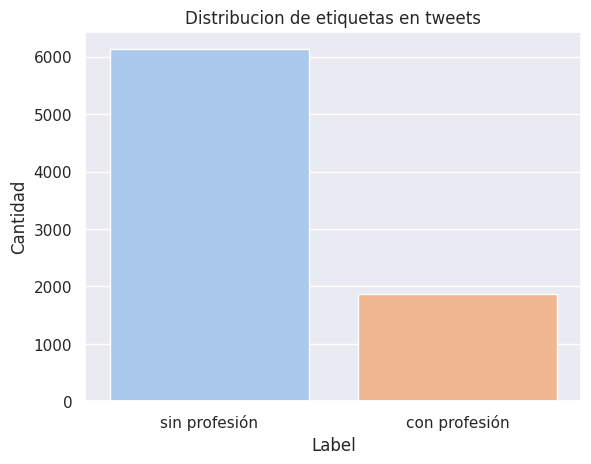

In [149]:
sns.countplot(x='label', data=datos_ejercicio, palette='pastel')
plt.xlabel('Label')
plt.ylabel('Cantidad')
plt.title('Distribucion de etiquetas en tweets')
xtick_labels = ['sin profesión', 'con profesión']
plt.gca().set_xticklabels(xtick_labels)
plt.show()

Observamos que el dataset está desbalanceado, por lo que podrían aplicarse técnicas de balanceo de datos.

**Distribución de la longitud de los tweet en caracteres:**

In [150]:
datos_ejercicio["char_len"] = datos_ejercicio["tweet_text"].apply(lambda x: len(x))

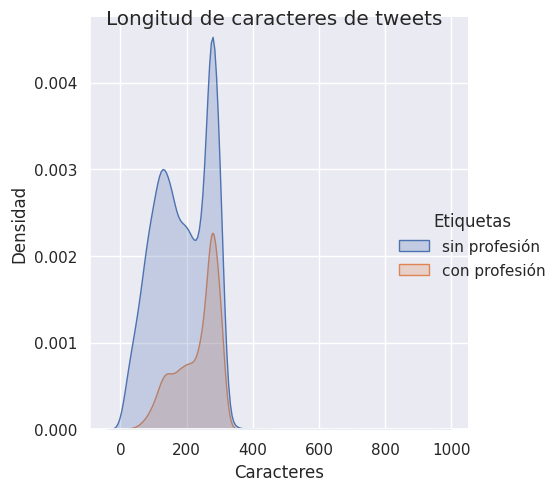

In [151]:
g = sns.displot(data=datos_ejercicio, x="char_len", kind="kde", hue='label', fill=True)
g.fig.suptitle('Longitud de caracteres de tweets')
g.set(xlabel='Caracteres',ylabel='Densidad')
g._legend.set_title('Etiquetas')
new_labels = ['sin profesión', 'con profesión']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

In [152]:
print(f'El promedio de longitud de caracteres para el label 0 es {datos_ejercicio.char_len[datos_ejercicio.label==0].mean()}')
print(f'El promedio de longitud de caracteres para el label 1 es {datos_ejercicio.char_len[datos_ejercicio.label==1].mean()}')

El promedio de longitud de caracteres para el label 0 es 187.48417618270798
El promedio de longitud de caracteres para el label 1 es 231.8673796791444


## 3. Preprocesado y Normalización

Posibles técnicas de normalizacion:
- Eliminar Emojis
- Eliminar menciones y URLs.
- Transformar a minúsculas.
- Eliminar stopwords.
- Eliminar signos de puntuación.
- Eliminar o transformar emojis.
- Tokenizar.
- Lematizar tokens.

Defino funciones de preprocesado:

In [153]:
# Funcion para eliminar los emojis encontrados
def clean_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [154]:
# Crear una función para eliminar las menciones y las URLs de cada tweet en el corpus
def remove_mentions(tweet):
    # Definir una expresión regular para encontrar menciones (@)
    mention_pattern = r'@[A-Za-z0-9_]+'
    tweet = re.sub(mention_pattern, '', tweet)  # Eliminar las menciones
    
    return tweet

In [155]:
# Quitar URLs
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

In [156]:
from nltk.tokenize import TweetTokenizer
# Tokenizar los tweets con el tokenizador "TweetTokenizer" de NLTK
def tokenize(texto):
  tweet_tokenizer = TweetTokenizer()
  tokens_list = tweet_tokenizer.tokenize(texto)
  return tokens_list

In [157]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Quitar stop words
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish')) 
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Aplico las funciones de preprocesado:

In [158]:
# Quitar emojis de los textos
datos_ejercicio["normalizado"] = datos_ejercicio["tweet_text"].apply(lambda x: clean_emojis(x))
# Quitar menciones
datos_ejercicio["normalizado"] = datos_ejercicio["normalizado"].apply(lambda x: remove_mentions(x))
# Quitar URLs
datos_ejercicio['normalizado'] = datos_ejercicio['normalizado'].apply(lambda x: remove_urls(x))
# Pasar a minúsculas
datos_ejercicio["normalizado"] = datos_ejercicio["normalizado"].apply(lambda x: x.lower())
# Quitar números
datos_ejercicio["normalizado"] = datos_ejercicio["normalizado"].apply(lambda x: str(x).replace("0", "").replace("1", "").replace("2", "").replace("3", "").replace("4", "").replace("5", "").replace("6", "").replace("7", "").replace("8", "").replace("9", ""))
# Sustituir saltos de línea (\n)
datos_ejercicio['normalizado'] = datos_ejercicio['normalizado'].apply(lambda x: re.sub('\n', ' ', x))
# Quitar las comillas
datos_ejercicio['normalizado'] = datos_ejercicio['normalizado'].apply(lambda x: re.sub('\'', ' ', x))
# Eliminar puntuación
datos_ejercicio['normalizado'] = datos_ejercicio['normalizado'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# Tokenización
datos_ejercicio["normalizado"] = datos_ejercicio["normalizado"].apply(lambda x: tokenize(x))
# Quito stopwords
datos_ejercicio["normalizado"] = datos_ejercicio["normalizado"].apply(lambda x: quitar_stopwords(x))

In [159]:
datos_ejercicio['normalizado'].iloc[1]

['san', 'francisco', 'eeuu', 'hace', 'años', 'tras', 'vivir', 'pandemia']

Una vez preprocesado procedo a generar una **nube de palabras** para tener una idea de los palabras clave de este corpus y de la temática general del mismo.

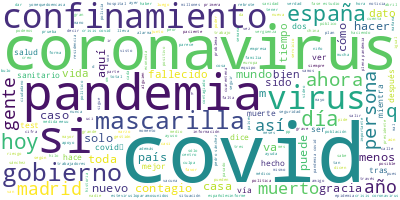

In [160]:
from wordcloud import WordCloud
corpus = list(datos_ejercicio['normalizado'].values)
# Unir las listas de tokens en una sola lista
lista_de_tokens = [token for lista in corpus for token in lista]
# Une las frases
long_string = ','.join(lista_de_tokens)
# Genera un objecto WordCloud 
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0, contour_color='steelblue')
# Genera el wordcloud
wordcloud.generate(long_string)
# Visualizalo en una imagen
wordcloud.to_image()

Por el *wordcloud* observamos claramente como el corpus trata de tweets relativos a la pandemia del covid-19 y de los tópicos relacionados con la misma como *pandemia*, *confinamiento*, *virus* o *mascarilla*, así como palabras que nos indican que son tweets de España.

In [162]:
# Funciones de Lematizacion y Stemming en español
!python -m spacy download es_core_news_sm
# Lemmatization
import spacy
import es_core_news_sm
import es_core_news_md
nlp = spacy.load('es_core_news_sm', disable=['parser', 'ner'])
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)

# Stemming
import string
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("spanish")
def stem(tokens):
    tokens = [ stemmer.stem(token) for token in tokens]
    return tokens

2023-04-27 20:52:55.602349: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 41.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [163]:
# Opción con Stemming
datos_ejercicio["stemmed"] = datos_ejercicio["normalizado"].progress_apply(lambda x: stem(x))

  0%|          | 0/8000 [00:00<?, ?it/s]

In [164]:
# Opción de lematización con Spacy
datos_ejercicio["lematizado"] = datos_ejercicio["normalizado"].progress_apply(lambda x: lematizar(x))

  0%|          | 0/8000 [00:00<?, ?it/s]

In [165]:
datos_ejercicio.lematizado

0       chino libera pandemia eeuu libero ovnis argent...
1        san francisco eeuu hacer año tras vivir pandemia
2       porfi poneo mascarilla nuevo canción artista c...
3       nuevo „ covid norma regla recibimiento “ comer...
4       si confinamiento dejado tocado estabilidad men...
                              ...                        
7995    lomásleer nuevo infectado coronavirus multipli...
7996    ayuso adjudico dedo contrato euros hacer vídeo...
7997    mes encerrado poder viajar provincia ir restau...
7998    gobierno prohíbir ley lis despido crisis coron...
7999                 rasgo psicológico lleva mascarilla 🤣
Name: lematizado, Length: 8000, dtype: object

In [166]:
datos_ejercicio.stemmed

0       [chin, liber, pandemi, eeuu, liber, ovnis, arg...
1       [san, francisc, eeuu, hac, años, tras, viv, pa...
2       [porfi, pone, mascarill, nuev, cancion, artist...
3       [nuev, „, cov, norm, regl, recib, “, comerci, ...
4       [si, confin, dej, toc, estabil, mental, siempr...
                              ...                        
7995    [lomasleid, nuev, infect, coronavirus, multipl...
7996    [ayus, adjud, ded, contrat, eur, hac, vide, co...
7997    [mes, encerr, pued, viaj, provinci, ir, restau...
7998    [gobiern, prohib, ley, lis, desp, crisis, coro...
7999                 [rasg, psicolog, llev, mascarill, 🤣]
Name: stemmed, Length: 8000, dtype: object

Observamos que el preprocesado nos devuelve los lemas y stems, aunque quizás siguen apareciendo ciertos signos de puntuación o emojis, que podría afinarse el proceso de limpieza con expresiones regulares más precisas.

Tokens más frecuentes en formato de gráfico de barras:

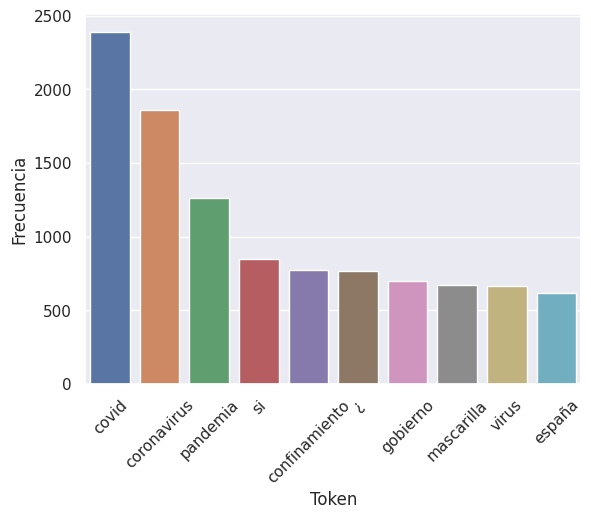

In [167]:
all_tokens = [token for tokens in datos_ejercicio["normalizado"] for token in tokens]
token_freq = pd.Series(all_tokens).value_counts()
top_tokens = token_freq[:10]
df_top_tokens = pd.DataFrame({"Token": top_tokens.index, "Frecuencia": top_tokens.values})
g = sns.barplot(x="Token", y="Frecuencia", data=df_top_tokens)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

## 4. Sentimiento y Vectorización

**Análisis de sentimiento:**

In [170]:
url_path = "https://www.cic.ipn.mx/~sidorov/SEL.txt"
sel_lexicon = pd.read_csv(url_path,sep="\t", encoding="latin-1")

In [171]:
dicc_mapping = {"Alegría":"positive",
                "Sorpresa":"positive",
                "Tristeza":"negative",
                "Enojo":"negative",
                "Miedo":"negative",
                "Repulsión":"negative"}
                
sel_lexicon["Categoría"] = sel_lexicon["Categoría"].map(dicc_mapping)

In [172]:
positive_words = dict(zip(sel_lexicon[sel_lexicon["Categoría"]=="positive"].Palabra, sel_lexicon[sel_lexicon["Categoría"]=="positive"][' PFA']))
negative_words = dict(zip(sel_lexicon[sel_lexicon["Categoría"]=="negative"].Palabra, sel_lexicon[sel_lexicon["Categoría"]=="negative"][' PFA']))

In [173]:
def calculate_sentiment(frase, positive_words=positive_words, negative_words=negative_words):
  """
  Función para calcular el score de sentimiento de una frase

  Args:
    frase [str]: Frase pre-preprocesada en español. Debe venir lematizada.
    positive_words [dict]: Diccionario de palabras positivas extraidas de SEL
    negative_words [dict]: Diccionario de palabras negativas extraídas de SEL

  Out:
    Sentiment score  
  """
  score = 0
  for i in frase.split():
    if i in positive_words:
      score = score + float(positive_words[i])
    elif i in negative_words:
      score = score - float(negative_words[i])
    else:
      score = score + 0
  
  return score

In [175]:
# Aplico la función para el corpus normalizado
datos_ejercicio['sentiment'] = datos_ejercicio['normalizado'].apply(lambda x: calculate_sentiment(' '.join(x))) 
# aplicamos la función sobre otra función que une los tokens como lista
datos_ejercicio['sentiment'].value_counts()

 0.000    4764
-0.696     211
-0.729     109
-0.596     106
 0.330      84
          ... 
-1.924       1
 0.735       1
-1.395       1
-1.789       1
 0.366       1
Name: sentiment, Length: 717, dtype: int64

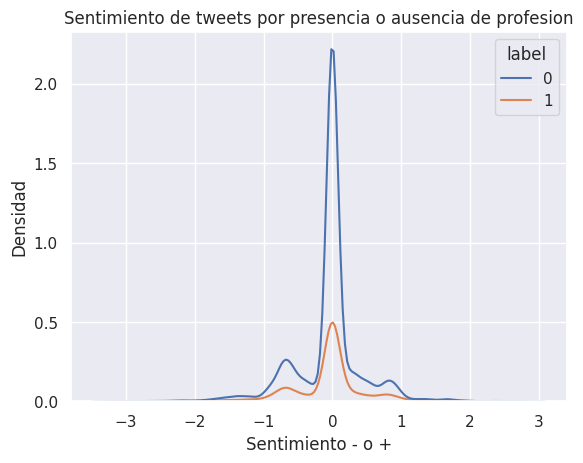

In [176]:
# Distribución del sentimiento en el corpus
sns.kdeplot(x=datos_ejercicio['sentiment'], hue=datos_ejercicio['label'])
plt.title("Sentimiento de tweets por presencia o ausencia de profesion")
plt.xlabel("Sentimiento - o +")
plt.ylabel("Densidad")
plt.show()

**Vectorización:**

Columnas del dataset resultantes:

In [177]:
datos_ejercicio.columns

Index(['tweet_id', 'tweet_text', 'label', 'set', 'char_len', 'normalizado',
       'stemmed', 'lematizado', 'sentiment'],
      dtype='object')

Partición de los datos de entrenamiento y validación:

In [178]:
datos_train = datos_ejercicio[datos_ejercicio['set'] == 'train']
datos_test = datos_ejercicio[datos_ejercicio['set'] == 'valid']

Instanciar el objeto vectorizador TF-IDF:

In [193]:
vectorizador = TfidfVectorizer(lowercase = False, stop_words =None,
                               min_df=0.01, ngram_range = (1,3), max_features = 500)

# Separo los vectores por train y test
vector_train = vectorizador.fit_transform(datos_train['lematizado'])
vector_test = vectorizador.transform(datos_test['lematizado'])

Añado el análisis de sentimiento como predictor adicional

In [194]:
extra_features_train = datos_train[['sentiment']]
extra_features_test = datos_test[['sentiment']]

In [195]:
import scipy as sp
# Extraemos las etiquetas y las asignamos a la variable y
y_train = datos_train['label']
y_test = datos_test['label']
# Unimos las características TFIDF con las características previamente seleccionadas
# Extraemos los valores (values) de las extra_features, que es un dataframe
X_train = sp.sparse.hstack((vector_train,extra_features_train.values),format='csr')
X_test = sp.sparse.hstack((vector_test,extra_features_test.values),format='csr')

Balanceo de datos de train:

In [196]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train.toarray(), y_train)

In [197]:
print(X_train.shape)
print(y_train.shape)

(9214, 202)
(9214,)


## 5. Entrenamiento y evaluación de modelos


In [183]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings 
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore') 
          # Generamos un Kfold
          KF = KFold(n_splits = 10, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)
          
          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)
          
          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

In [184]:
# Cargamos los modelos clasificadores
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic",LogisticRegression(random_state=30)),
         ("GaussianNB",GaussianNB()),
          ('DecisionTree',DecisionTreeClassifier(random_state=30)),
          ('RandomForest',RandomForestClassifier(random_state=30)),
          ("XGBoost",XGBClassifier())
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, X.toarray(), y)  

Metric: accuracy , KFold 
Logistic: 0.817375 (0.007954) 
Metric: accuracy , KFold 
GaussianNB: 0.720000 (0.016327) 
Metric: accuracy , KFold 
DecisionTree: 0.748625 (0.014345) 
Metric: accuracy , KFold 
RandomForest: 0.817000 (0.008352) 
Metric: accuracy , KFold 
XGBoost: 0.811875 (0.008772) 


([array([0.80625, 0.82625, 0.81375, 0.83   , 0.82375, 0.82   , 0.82125,
         0.8075 , 0.8075 , 0.8175 ]),
  array([0.74375, 0.74875, 0.71125, 0.7375 , 0.7025 , 0.70875, 0.71375,
         0.71625, 0.7    , 0.7175 ]),
  array([0.7375 , 0.735  , 0.75125, 0.7825 , 0.76375, 0.7425 , 0.75   ,
         0.73125, 0.74375, 0.74875]),
  array([0.80375, 0.81625, 0.81125, 0.82875, 0.83125, 0.8175 , 0.82375,
         0.81125, 0.80875, 0.8175 ]),
  array([0.80875, 0.8125 , 0.8025 , 0.82875, 0.82125, 0.79875, 0.8175 ,
         0.81625, 0.80375, 0.80875])],
 ['Logistic', 'GaussianNB', 'DecisionTree', 'RandomForest', 'XGBoost'])

Busco mejorar el modelo con tuneo de hiperparámetros del mejor modelo obtenido a priori (RandomForest):

In [205]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Define the models and parameters
model = RandomForestClassifier()
n_estimators = [10, 50, 100]
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']

In [207]:
grid = {'n_estimators': n_estimators,
              'criterion': criterion,
              'max_features': max_features}
cv = KFold(n_splits=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [208]:
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor accuracy: 0.880308 usando los parámetros {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}


In [209]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model=RandomForestClassifier(criterion='gini',max_features='log2', n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier(max_features='log2')

Obtención del reporte de clasificación del modelo:

In [210]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1388  135]
 [ 305  172]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1523
           1       0.56      0.36      0.44       477

    accuracy                           0.78      2000
   macro avg       0.69      0.64      0.65      2000
weighted avg       0.76      0.78      0.76      2000



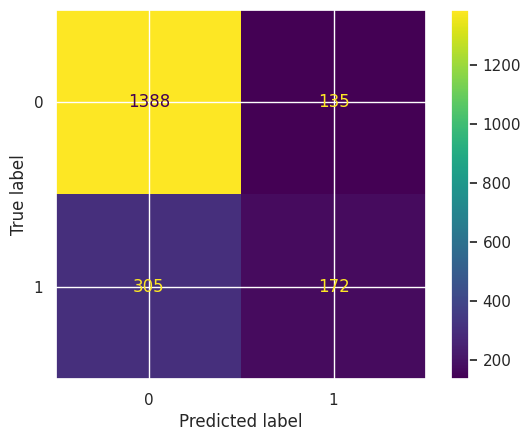

In [211]:
# Heatmap de Matriz de Confusion
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)